In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
ckd = Table.read_table('data/ckd.csv')
ckd = ckd.relabeled('Blood Glucose Random', 'Glucose').select('Glucose', 'Hemoglobin', 'White Blood Cell Count', 'Class')

In [5]:
patients = Table.read_table('data/breast-cancer.csv').drop('ID')

def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

# Google Science Fair

In [7]:
patients = Table.read_table('data/breast-cancer.csv').drop('ID')
patients.show(5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0


In [8]:
patients.group('Class')

Class,count
0,444
1,239


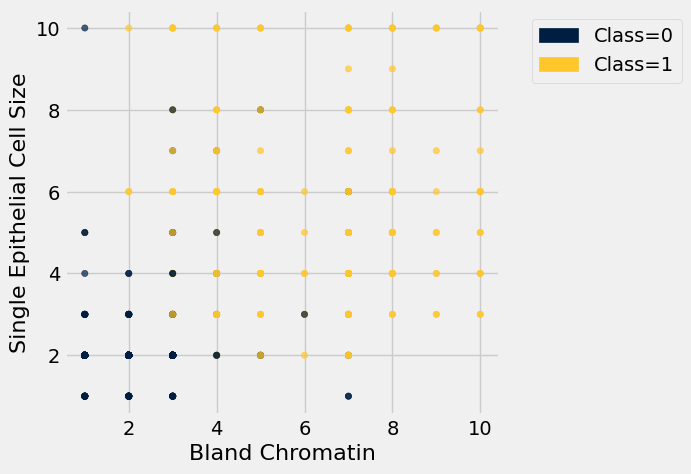

In [9]:
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Class')

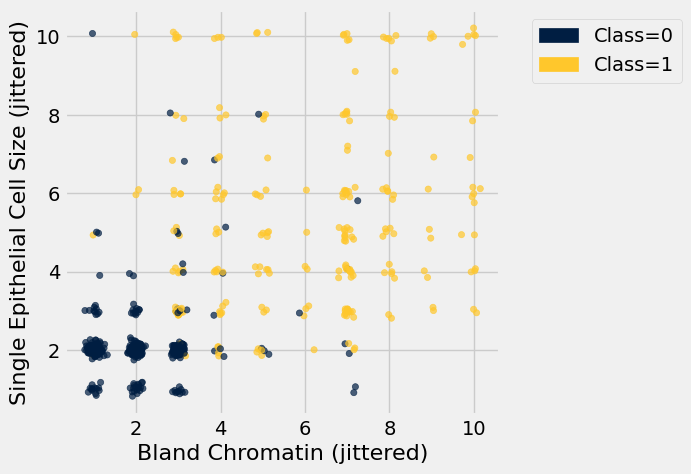

In [10]:
jittered.scatter(0, 1, group='Class')

---
back to slides

--- 

## Distance ##

$ d = \sqrt{(x_0 - x_1)^2 + (y_0 - y_1)^2} $

$ d = \sqrt{(x_0 - x_1)^2 + (y_0 - y_1)^2 + (z_0 - z_1)^2} $

Todo:
- Define a function that computes the distance between two arrays
- Define a function that computes the distance between two rows

Examples:
- Compute the distance between row 0 and row 1
- Compute the distance between row 0 and row 2
- Compute the distance between row 0 and row 0 

Remember that you need to drop the "Class" column

Do those results make sense? Compare it to the patients table



# The Classifier

- Write a function that takes a single row (`example`) and computes the distances to all rows in a table (`training`)
- Append the distances to the `training` table and return the appended table
- Remember that you can iterate over items directly
- Remember that you need to drop the `Class` column

Next,
- Set `example` to an arbitrary row
- Set training to a table containing everything but the `example` row
- Compute the distances
- Sort the table by the distances


Now, 
- write a function that calls the distance function and then extracts only the `k` closest rows
- call the closest function

Next,
- extract the `Class` of the majority of the `k` closest rows

- Write a function `majority_class` that extracts the majority class
- Write a `classify` function that takes `training`, `example`, and `k` and returns the majority class
- try the classify function on some examples (try e.g. row 21, 10, 15). Compare the results to the actual class.

## Review of the Steps ##

- `distance(pt1, pt2)`: Returns the distance between the arrays `pt1` and `pt2`
- `row_distance(row1, row2)`: Returns the distance between the rows `row1` and `row2`
- `distances(training, example)`: Returns a table that is `training` with an additional column `'Distance'` that contains the distance between `example` and each row of `training`
- `closest(training, example, k)`: Returns a table of the rows corresponding to the k smallest distances 
- `majority_class(topk)`: Returns the majority class in the `'Class'` column
- `classify(training, example, k)`: Returns the predicted class of `example` based on a `k` nearest neighbors classifier using the historical sample `training`

---
return to slides

---

## Accuracy of a Classifier ##
- split the dataset **randomly** into a training set and a test set
- write an evaluation function which 
    - computes the classification for each row in the test set
    - counts how many classifications were done correctly
- evaluate for varying values of k

# Standardize if Necessary

In [38]:
def standard_units(x):
    return (x - np.average(x)) / np.std(x)

In [39]:
ckd_new = ckd.select('Class').with_columns(
    'Glucose_su', standard_units(ckd.column('Glucose')),
    'Hemoglobin_su', standard_units(ckd.column('Hemoglobin')),
    'WBC_su', standard_units(ckd.column('White Blood Cell Count'))
)

In [40]:
ckd_new

Class,Glucose_su,Hemoglobin_su,WBC_su
1,-0.221549,-0.865744,-0.569768
1,-0.947597,-1.45745,1.16268
1,3.84123,-1.00497,-1.27558
1,0.396364,-2.81488,0.809777
1,0.643529,-2.08395,0.232293
1,-0.561402,-1.35303,-0.505603
1,2.04928,-0.413266,0.360623
1,-0.947597,-1.28342,3.34429
1,1.87936,-1.10939,-0.409356
1,0.489051,-1.35303,1.96475


In [41]:
shuffled = ckd_new.sample(with_replacement=False) 
training_set = shuffled.take(np.arange(74))
test_set  = shuffled.take(np.arange(74, 148))

In [42]:
evaluate_accuracy(training_set, test_set, 3)

0.9324324324324325

In [43]:
shuffled = ckd.sample(with_replacement=False) 
training_set = shuffled.take(np.arange(74))
test_set  = shuffled.take(np.arange(74, 148))

In [44]:
evaluate_accuracy(training_set, test_set, 3)

0.7567567567567568